#**Prediction of loan approval of customers based on Credit Scoring Using Machine Learning/Deep Learning**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import matplotlib 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/loan_data_set.csv")

In [ ]:
df.shape

(614, 12)

In [ ]:
df.head()

,Gender,Married,Dependent,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmount_Term,Credit_History,Property_Area,LoanStatus
0,0.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
df.describe()

,Gender,Married,Dependent,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmount_Term,Credit_History,Property_Area,LoanStatus
count,601.000000,611.000000,599.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.186356,0.651391,0.848080,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459,0.687296
std,0.389718,0.476920,1.220762,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,0.000000,1.000000,2.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    float64
 1   Married            611 non-null    float64
 2   Dependent          599 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      582 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   LoanAmount_Term    600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  LoanStatus         614 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 57.7 KB


###**PRE-PROCESSING**

In [ ]:
df.isnull().sum()

Gender               13
Married               3
Dependent            15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
LoanAmount_Term      14
Credit_History       50
Property_Area         0
LoanStatus            0
dtype: int64

In [ ]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())
df['LoanAmount_Term']=df['LoanAmount_Term'].fillna(df['LoanAmount_Term'].mean())

In [ ]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependent']=df['Dependent'].fillna(df['Dependent'].mode()[0])

In [ ]:
df.isnull().sum()

Gender               0
Married              0
Dependent            0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmount_Term      0
Credit_History       0
Property_Area        0
LoanStatus           0
dtype: int64

###**DATA VISUALISATION**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


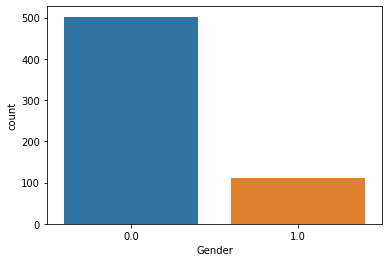

In [ ]:
sns.countplot(df['Gender']) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


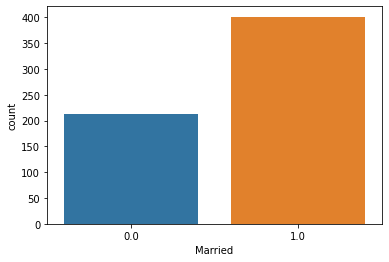

In [ ]:
sns.countplot(df['Married'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


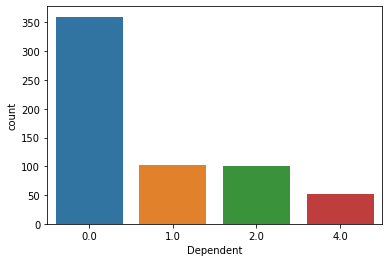

In [ ]:
sns.countplot(df['Dependent'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


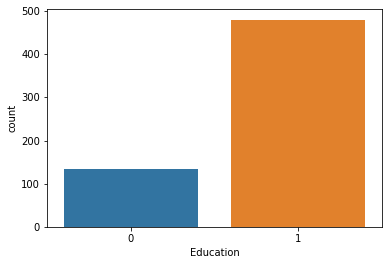

In [ ]:
sns.countplot(df['Education'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


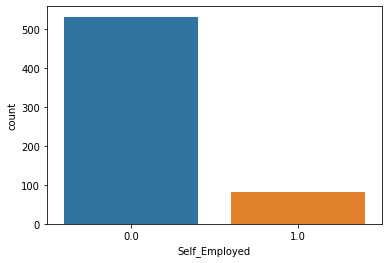

In [ ]:
sns.countplot(df['Self_Employed'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


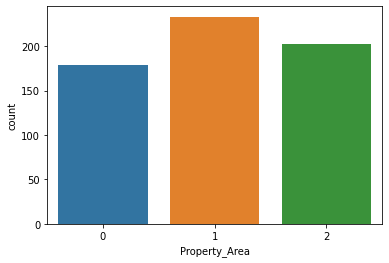

In [ ]:
sns.countplot(df['Property_Area'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


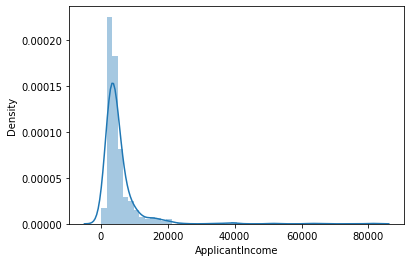

In [ ]:
sns.distplot(df['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


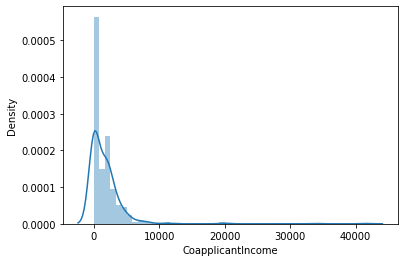

In [ ]:
sns.distplot(df['CoapplicantIncome'])

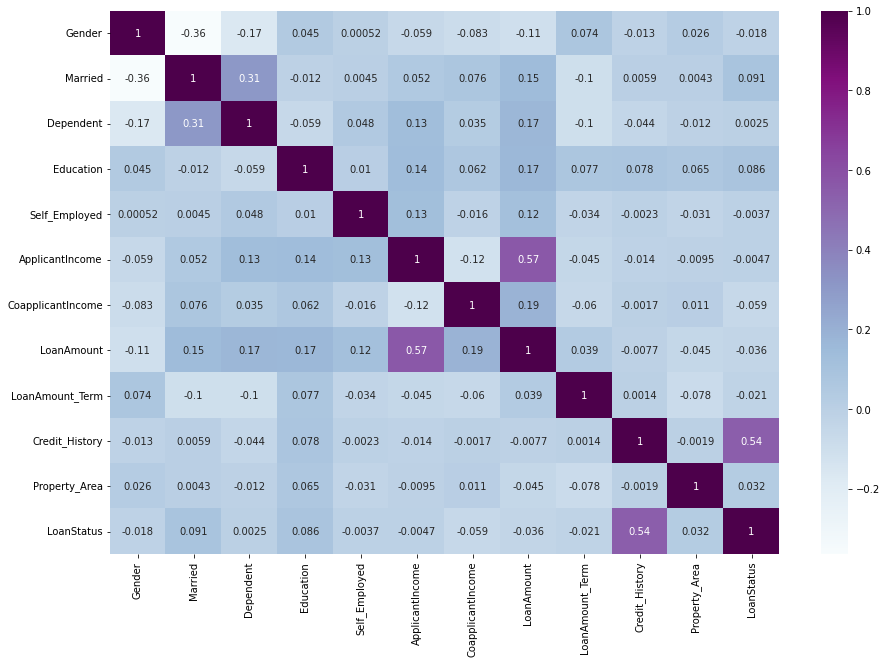

In [ ]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="BuPu")

In [ ]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Gender,Married,Dependent,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmount_Term,Credit_History,Property_Area,LoanStatus,Total_Income
0,0.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0


In [ ]:
df['ApplicantIncomelog']=np.log(df['ApplicantIncome'])

In [ ]:
df['LoanAmountlog']=np.log(df['LoanAmount'])

In [ ]:
df['LoanAmount_Term_log']=np.log(df['LoanAmount_Term'])

In [ ]:
df['Total_Incomelog']=np.log(df['Total_Income'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


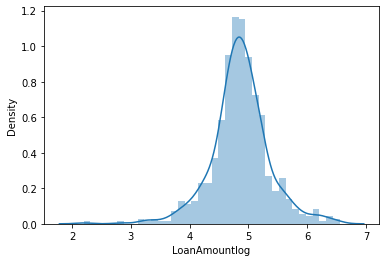

In [ ]:
sns.distplot(df['LoanAmountlog'])

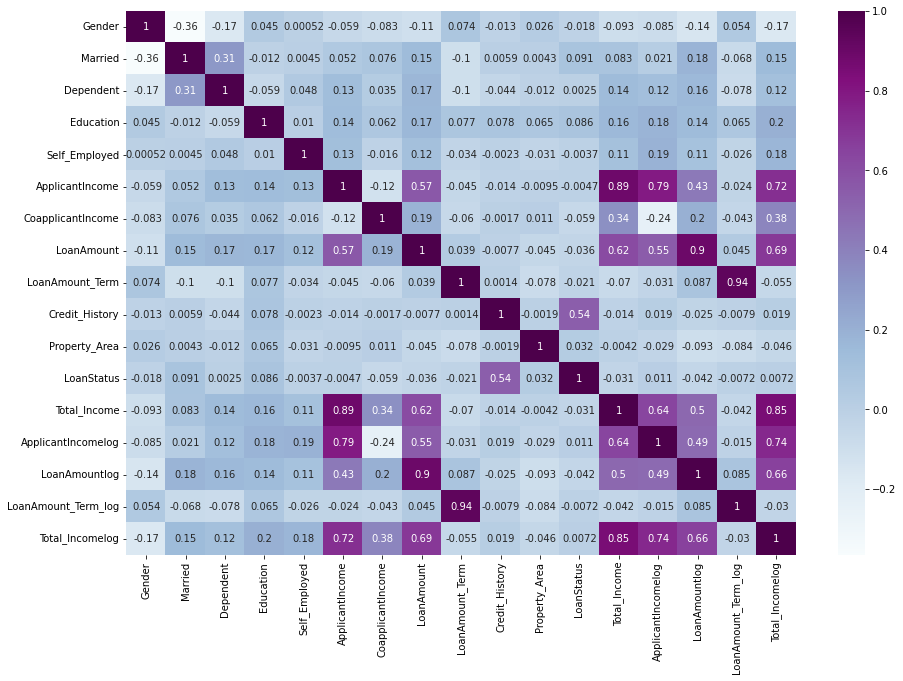

In [ ]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="BuPu")

In [ ]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "LoanAmount_Term"]
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependent,Education,Self_Employed,Credit_History,Property_Area,LoanStatus,Total_Income,ApplicantIncomelog,LoanAmountlog,LoanAmount_Term_log,Total_Incomelog
0,0.0,0.0,0.0,1,0.0,1.0,2,1,5849.0,8.674026,4.986426,5.886104,8.674026
1,0.0,1.0,1.0,1,0.0,1.0,0,0,6091.0,8.430109,4.852030,5.886104,8.714568
2,0.0,1.0,0.0,1,1.0,1.0,2,1,3000.0,8.006368,4.189655,5.886104,8.006368
3,0.0,1.0,0.0,0,0.0,1.0,2,1,4941.0,7.856707,4.787492,5.886104,8.505323
4,0.0,0.0,0.0,1,0.0,1.0,2,1,6000.0,8.699515,4.948760,5.886104,8.699515


###**Calculating Credit Score on the basis of four parameters:Income,Education,Employment and Loan Amount**

In [ ]:
df['CS_Income']=[200 if ((x>=9.8)&(x<11.4)) else 150 if((x>=8.4)&(x<9.8)) else 100 for x in df['Total_Incomelog']]
df['CS_Education']=[150 if (x==1) else 90 for x in df['Education']]
df['CS_Employment']=[150 if (x==1) else 100 for x in df['Self_Employed']]
df['CS_Loan']=[200 if (x<4.5) else 140  if ((x<5)&(x>=4.5)) else 100 for x in df['LoanAmountlog']]

In [ ]:
df['Credit_Score']=df['CS_Income']+df['CS_Employment']+df['CS_Education']+df['CS_Loan']

In [ ]:
del df['CS_Income']
del df['CS_Education']
del df['CS_Employment']
del df['CS_Loan']

In [ ]:
df[['Credit_Score']]

,Credit_Score
0,540
1,540
2,600
3,480
4,540
...,...
609,550
610,550
611,500
612,500


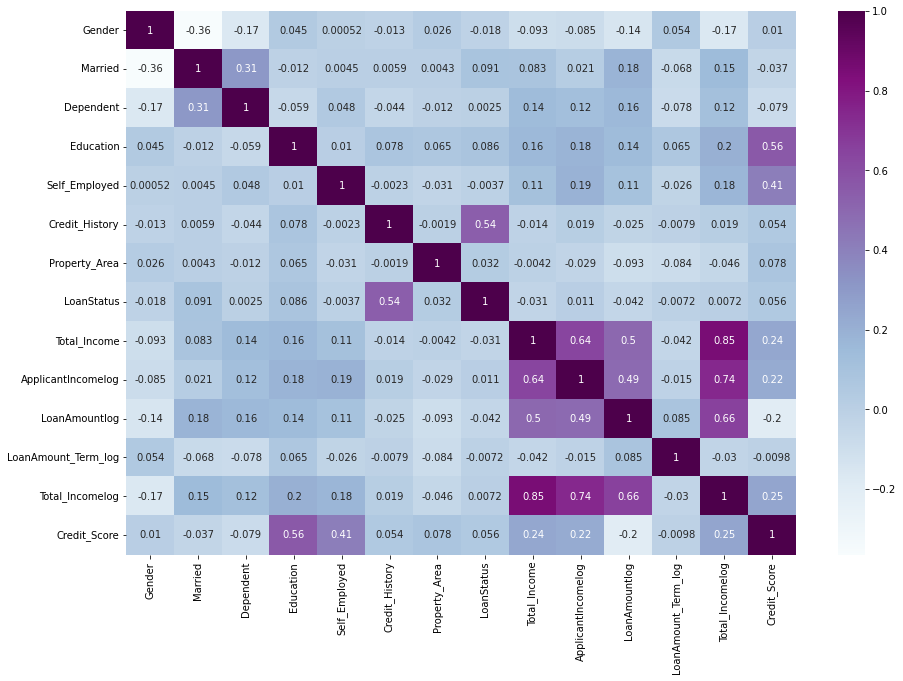

In [ ]:
corr=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True,cmap="BuPu")

##**Training and Testing**

In [ ]:
X = df.drop(columns=['LoanStatus'], axis=1)
y = df['LoanStatus']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=77)

In [ ]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=77)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    print("Accuracy is", model.score(x_test, y_test)*100)
    score = cross_val_score(model, x, y,cv=5)
    print("Cross validation is",np.mean(score)*100)
    print(f'Confusion Matrix:\n{confusion_matrix(y_test,pred)}')
    print(f'\nClassification Report:\n{classification_report(y_test,pred)}')

##**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 82.26600985221675
Cross validation is 80.61975209916034
Confusion Matrix:
[[ 27  32]
 [  4 140]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.46      0.60        59
           1       0.81      0.97      0.89       144

    accuracy                           0.82       203
   macro avg       0.84      0.71      0.74       203
weighted avg       0.83      0.82      0.80       203



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


##**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify(model,X,y)

Accuracy is 69.95073891625616
Cross validation is 72.3137411701986
Confusion Matrix:
[[ 37  22]
 [ 39 105]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.63      0.55        59
           1       0.83      0.73      0.77       144

    accuracy                           0.70       203
   macro avg       0.66      0.68      0.66       203
weighted avg       0.73      0.70      0.71       203



##**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model=RandomForestClassifier()
classify(model,X,y)

Accuracy is 82.26600985221675
Cross validation is 78.50193256030921
Confusion Matrix:
[[ 31  28]
 [  8 136]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.53      0.63        59
           1       0.83      0.94      0.88       144

    accuracy                           0.82       203
   macro avg       0.81      0.73      0.76       203
weighted avg       0.82      0.82      0.81       203



##**LINEAR DISCRIMINANT ANALYSIS**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model=LinearDiscriminantAnalysis()
classify(model,X,y)

Accuracy is 81.77339901477832
Cross validation is 80.78368652538984
Confusion Matrix:
[[ 27  32]
 [  5 139]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.46      0.59        59
           1       0.81      0.97      0.88       144

    accuracy                           0.82       203
   macro avg       0.83      0.71      0.74       203
weighted avg       0.82      0.82      0.80       203



##**K NEAREST NEIGHBOUR**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=30)
classify(model,X,y)

Accuracy is 70.93596059113301
Cross validation is 68.89377582300413
Confusion Matrix:
[[  0  59]
 [  0 144]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.71      1.00      0.83       144

    accuracy                           0.71       203
   macro avg       0.35      0.50      0.41       203
weighted avg       0.50      0.71      0.59       203



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
